# Pandas 1
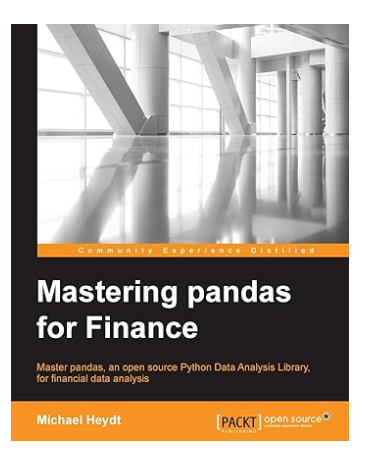

In [3]:
import pandas as pd
import numpy as np

### Creare una serie
Proviamo a creare una serie pandas utilizzando dei numeri casuali generati con la libreria numpy. <br>
Utilizziamo la proprietà random, con cui è possibile generare numeri pseudocasuali: specificando il medesimo seed è possibile generare sempre gli stessi numeri pseudocasuali (in questo caso utilizziamo sempre "1" come seed).

In [4]:
np.random.seed(1)
s = pd.Series(np.random.randn(100))

In [5]:
s.head(21) # restituisce i primi 21 valori della serie (da 0 a 20)

0     1.624345
1    -0.611756
2    -0.528172
3    -1.072969
4     0.865408
5    -2.301539
6     1.744812
7    -0.761207
8     0.319039
9    -0.249370
10    1.462108
11   -2.060141
12   -0.322417
13   -0.384054
14    1.133769
15   -1.099891
16   -0.172428
17   -0.877858
18    0.042214
19    0.582815
20   -1.100619
dtype: float64

In [6]:
s[2] # restituisce il terzo elemento della serie (le serie sono indicizzate a partire da 0)

-0.5281717522634557

In [7]:
s[[2,5,20]] # è possibile passare tra le quadre un array di posizioni per far restituire soltanto le posizioni di interesse

2    -0.528172
5    -2.301539
20   -1.100619
dtype: float64

In [8]:
s[3:8] # restituisce gli elementi compresi tra le posizioni specificate (estremo finale escluso)

3   -1.072969
4    0.865408
5   -2.301539
6    1.744812
7   -0.761207
dtype: float64

In [9]:
s.tail(10) # restituisce gli ultimi 10 elementi della serie

90    1.198918
91    0.185156
92   -0.375285
93   -0.638730
94    0.423494
95    0.077340
96   -0.343854
97    0.043597
98   -0.620001
99    0.698032
dtype: float64

In [10]:
s.index # proprietà che permette di conoscere come la serie è indicizzata

RangeIndex(start=0, stop=100, step=1)

In [11]:
s.values # proprietà che elenca i valori della serie in un array

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

È possibile decidiere di indicizzare una serie in maniera diversa da quella default

In [132]:
s2 = pd.Series([1,2,3,4], index = ['a', 'b', 'c', 'd'])
s2

a    1
b    2
c    3
d    4
dtype: int64

Anche a partire da un dizionario chiave:valore può essere creata una serie, in cui la chiave di ciascun elemento del dizionario corrisponderà all'indice di tale elemento nella serie

In [133]:

s3 = pd.Series({'a':1, 'b':2, 'c':3, 'd':4})

a    1
b    2
c    3
d    4
dtype: int64

Il numero di elementi di una serie può essere determinato utilizzando la funzione `len()`.

In [135]:
s = pd.Series([10,0,1,1,2,3,4,5,6,np.nan])
s

0    10.0
1     0.0
2     1.0
3     1.0
4     2.0
5     3.0
6     4.0
7     5.0
8     6.0
9     NaN
dtype: float64

In [16]:
len(s)

10

Un altro modo per determinare la dimensione di una serie è utilizzare la proprietà `shape` che restituisce una tupla con le dimensioni, numero righe e numero colonne.<br>
Nel caso di una serie avente una sola dimensione, si ottiene una tupla contenente un solo valore.

In [136]:
s.shape

(10,)

Nella serie di esempio abbiamo un valore che non è un numero (np.nan): per contare solo i valori numerici si utilizza il metodo `count()`.

In [18]:
s.count()

9

Per conoscere invece i valori unici di una serie si utilizza il metodo `unique()`.

In [19]:
s.unique()

array([10.,  0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

E per contare invece il numero di volte in cui appaiono tali valori unici nella serie si usa il metodo `value_counts()`, il quale restituisce i valori già ordinati in ordine decrescente.

In [20]:
s.value_counts()

1.0     2
10.0    1
0.0     1
2.0     1
3.0     1
4.0     1
5.0     1
6.0     1
Name: count, dtype: int64

__NB__: una differenza fondamentale fra gli array di Numpy e le serie di Pandas è che le serie sono in grado di effettuare l'allineamento automatico sulla base dell'etichette poste come indici; questo significa che gli elementi appartenenti a due diverse serie vengono fatti corrispondere sulla base dell'etichetta, non sulla base della sola posizione come invece avviene negli array Numpy.

In [21]:
s3 = pd.Series([1,2,3,4], index = ['a','b','c','d'])

In [22]:
s3

a    1
b    2
c    3
d    4
dtype: int64

In [23]:
s4 = pd.Series([4,3,2,1], index = ['d','c','b','a'])
s4

d    4
c    3
b    2
a    1
dtype: int64

Avendo gli stessi indici è possibile sommare le due serie, ottenendo una nuova serie contenente in ciascun elemento la somma degli elementi delle due serie sommate. <br>
__NB__: nonostante le etichette siano state assegnate agli indici in un ordine differente nelle due serie, la somma avviene comunque facendo combaciare tali etichette.

In [24]:
s3 + s4

a    2
b    4
c    6
d    8
dtype: int64

Negli array Numpy invece, l'operazione viene effettuata solo sulla base della posizione: sommare due array significa quindi ottenere un nuovo array dove ciascun elemento è dato dalla somma degli elementi posti in nella medesima posizione nei due array.

In [25]:
np3 = np.array([1,2,3,4])
np4 = np.array([4,3,2,1])

In [26]:
np3 + np4

array([5, 5, 5, 5])

### Creare un dataframe

Un DataFrame può essere creato combinando diversi array Numpy.

In [27]:
pd.DataFrame(np.array([[10,11],[20,21],[30,31]]))

,0,1
0,10,11
1,20,21
2,30,31


Se non si specificano i valori degli indici e i nomi delle colonne, Pandas utilizza numeri interi.

Un DataFrame può anche essere creato combinando diverse serie Pandas.

In [28]:
df1 = pd.DataFrame([pd.Series(np.arange(10,15)),
                   pd.Series(np.arange(15,20))])
df1

,0,1,2,3,4
0,10,11,12,13,14
1,15,16,17,18,19


Per conoscere le dimensioni di un DataFrame è possibile nuovamente fare uso della proprietà `shape`. <br>
__NB__: un DataFrame ha solo due dimensioni, quindi `shape` restituisce sempre una tupla del tipo (numero_righe, numero_colonne).

In [29]:
df1.shape

(2, 5)

Per associare un nome alle colonne si fa uso del parametro `columns`.

In [30]:
df = pd.DataFrame(np.array([[10,11],[20,21],[30,31]]), columns = ['a','b'])
df

,a,b
0,10,11
1,20,21
2,30,31


E per conoscere il nome delle colonne di un DataFrame si usa l'omonima proprietà.

In [31]:
df.columns

Index(['a', 'b'], dtype='object')

__NB__: è possibile sovrascrivere i nomi delle colonne di un DataFrame assegnando i nuovi nomi alla sua proprietà `columns`.

In [32]:
df.columns = ['c1', 'c2']
df

,c1,c2
0,10,11
1,20,21
2,30,31


__NB__: vale lo stesso identico discorso per le righe, questa volta usando la proprietà `index`.

In [33]:
df.index = ['r1', 'r2', 'r3']
df

,c1,c2
r1,10,11
r2,20,21
r3,30,31


La proprietà `index` serve anche per conoscere i nomi degli indici del DataFrame.

In [137]:
df.index

RangeIndex(start=0, stop=5, step=1)

### Esempi

Creiamo un dataframe partendo da un file csv che contiene dati sulle 500 società che costituiscono l'indice della borsa americana Standard & Poors 500.
Con il parametro index_col scegliamo la colonna che sarà l'indice del dataframe che stiamo creando.

In [35]:
sp500 = pd.read_csv("sp500.csv", index_col='Symbol')

Vediamo le dimensioni del df. Sono 500 righe e 14 colonne

In [36]:
sp500.shape

(500, 14)

In [37]:
sp500.index

Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ACE', 'ACT', 'ADBE', 'AES', 'AET', 'AFL',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZMH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=500)

In [38]:
sp500.columns

Index(['Name', 'Sector', 'Price', 'Dividend Yield', 'Price/Earnings',
       'Earnings/Share', 'Book Value', '52 week low', '52 week high',
       'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

Per ora ci interessano solo alcune colonne. Possiamo selezionarle in due modi.
Il primo è leggere il file csv indicando quali colonne ci interessano con il parametro usecols

In [39]:
sp500_1 = pd.read_csv("sp500.csv", index_col='Symbol', usecols = [0, 2, 3])

In [40]:
sp500_1.head(10)

,Sector,Price
Symbol,,
MMM,Industrials,141.14
ABT,Health Care,39.60
ABBV,Health Care,53.95
ACN,Information Technology,79.79
ACE,Financials,102.91
ACT,Health Care,213.77
ADBE,Information Technology,64.30
AES,Utilities,13.61
AET,Health Care,76.39


In [41]:
sp500_2 = sp500[['Sector','Price','Book Value']]

In [42]:
sp500_2.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


In [43]:
sp500_3 = sp500.iloc[:,[1,2,6]]

In [44]:
sp500_3

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897
...,...,...,...
YHOO,Information Technology,35.02,12.768
YUM,Consumer Discretionary,74.77,5.147
ZMH,Health Care,101.84,37.181


Attenzione. I df creati non sono "nuovi" ma solo viste che fanno riferimento a quello originale. Per creare effettivamente un nuovo Df occorre aggiungere il metodo "copy"

In [45]:
sp500_4 = sp500.iloc[:,[1,2,6]].copy()

Si può accedere a una singola colonna di un df trasformandola in una serie con il comando df.nomecolonna, ma questo funziona solo se il nome è senza spazi

In [46]:
sp500.Price

Symbol
MMM     141.14
ABT      39.60
ABBV     53.95
ACN      79.79
ACE     102.91
         ...  
YHOO     35.02
YUM      74.77
ZMH     101.84
ZION     28.43
ZTS      30.53
Name: Price, Length: 500, dtype: float64

In [47]:
sp500.BookValue

AttributeError: 'DataFrame' object has no attribute 'BookValue'

### Selezionare righe in un DF


Per selezionare righe in un DF ci sono tre modi:
- individuare una fetta di Df ("slicing") con [];
- cercare gli elementi sulla base di etichetta o numero indice con gli operatori .loc, .iloc
- ricerca scalare con gli operatori .at e .iat

L'operatore [] va bene per selezionare elementi di una serie ma  è sconsigliato, se non in casi particolari, per selezionare righe di un DF.

Selezione utilizzando l'operatore [].
Come detto è sconsigliato, sia per motivi di performance, sia perché la sintassi simile a quella per la selezione delle colonne può generare confusione

In [48]:
sp500_1[:3]

,Sector,Price
Symbol,,
MMM,Industrials,141.14
ABT,Health Care,39.60
ABBV,Health Care,53.95


In [49]:
sp500_1['XYL':'YUM']

,Sector,Price
Symbol,,
XYL,Industrials,38.42
YHOO,Information Technology,35.02
YUM,Consumer Discretionary,74.77


Selezione utilizzando .loc[] e .iloc[].
.loc funziona con i nomi dell'indice
.iloc con i valori

In [50]:
sp500_1.loc['MMM']

Sector    Industrials
Price          141.14
Name: MMM, dtype: object

In [51]:
sp500_1.loc[['MMM','MSFT']]

,Sector,Price
Symbol,,
MMM,Industrials,141.14
MSFT,Information Technology,40.12


In [52]:
sp500_1.iloc[[0,5]]

,Sector,Price
Symbol,,
MMM,Industrials,141.14
ACT,Health Care,213.77


In [53]:
sp500_1.iloc[0:5]

,Sector,Price
Symbol,,
MMM,Industrials,141.14
ABT,Health Care,39.60
ABBV,Health Care,53.95
ACN,Information Technology,79.79
ACE,Financials,102.91


Con index.get_loc si può sapere qual è il valore dell'indice associato a una riga

In [54]:
sp500_1.index.get_loc('MSFT')

302

In [55]:
i1 = sp500_1.index.get_loc('MMM')
i2 = sp500_1.index.get_loc('A')
i1, i2

(0, 10)

In [56]:
sp500_1.iloc[[i1,i2]]

,Sector,Price
Symbol,,
MMM,Industrials,141.14
A,Health Care,56.18


In passato  c'era anche la possibilità di selezionare le rgihe utilizzando .ix ma nelle versioni più recenti di pandas no

Ricerca di valori scalari utilizzando .at[] e .iat[]

In [57]:
sp500_1.head()

,Sector,Price
Symbol,,
MMM,Industrials,141.14
ABT,Health Care,39.60
ABBV,Health Care,53.95
ACN,Information Technology,79.79
ACE,Financials,102.91


In [58]:
sp500_1.at['MMM', 'Sector']

'Industrials'

In [59]:
sp500_1.iat[0,1]

141.14

Selezione di righe utilizzando l'operatore Booleano

In [60]:
sp500_1[sp500_1.Price < 20]

,Sector,Price
Symbol,,
AES,Utilities,13.61
AA,Materials,13.52
AVP,Consumer Staples,14.14
BAC,Financials,14.72
BEAM,Consumer Discretionary,0.00
BSX,Health Care,12.83
CVC,Consumer Discretionary,17.45
CLF,Materials,16.34
DNR,Energy,16.71


Si possono fare ricerche più dettagliate, selezionando anche le sole colonne che interessanto

In [61]:
sp500_1[(sp500_1.Price < 20) & (sp500_1.Price > 10)][['Sector','Price']]

,Sector,Price
Symbol,,
AES,Utilities,13.61
AA,Materials,13.52
AVP,Consumer Staples,14.14
BAC,Financials,14.72
BSX,Health Care,12.83
CVC,Consumer Discretionary,17.45
CLF,Materials,16.34
DNR,Energy,16.71
F,Consumer Discretionary,16.02


### Operazioni su DataFrame

Le operazioni aritmetiche utilizzando scalari vengono applicate a tutto il DF

In [62]:
np.random.seed(123456)

In [63]:
df = pd.DataFrame(np.random.randn(5,4), columns = ['A','B','C','D'])
df

,A,B,C,D
0,0.469112,-0.282863,-1.509059,-1.135632
1,1.212112,-0.173215,0.119209,-1.044236
2,-0.861849,-2.104569,-0.494929,1.071804
3,0.721555,-0.706771,-1.039575,0.271860
4,-0.424972,0.567020,0.276232,-1.087401


In [64]:
df*2

,A,B,C,D
0,0.938225,-0.565727,-3.018117,-2.271265
1,2.424224,-0.346429,0.238417,-2.088472
2,-1.723698,-4.209138,-0.989859,2.143608
3,1.443110,-1.413542,-2.079150,0.543720
4,-0.849945,1.134041,0.552464,-2.174801


Operazioni su una singola riga ("row-wise broadcast"

In [65]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.743000,0.109649,1.628267,0.091396
2,-1.330961,-1.821706,1.014129,2.207436
3,0.252443,-0.423908,0.469484,1.407492
4,-0.894085,0.849884,1.785291,0.048232


Operazioni su parti di un DF

In [66]:
subframe = df[1:4][['B','C']]
subframe

,B,C
1,-0.173215,0.119209
2,-2.104569,-0.494929
3,-0.706771,-1.039575


In [67]:
df - subframe
#come si può vedere l'operazione viene effettuata dove ci sono valori da sottrarre, altrimenti rerstituisce NaN

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN
2,NaN,0.0,0.0,NaN
3,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN


Operazioni su colonne

In [68]:
a_col = df['A']

In [69]:
df.sub(a_col, axis=0)
#.sub() sottrae da tutto il DF il valore fra parentesi

,A,B,C,D
0,0.0,-0.751976,-1.978171,-1.604745
1,0.0,-1.385327,-1.092903,-2.256348
2,0.0,-1.242720,0.366920,1.933653
3,0.0,-1.428326,-1.761130,-0.449695
4,0.0,0.991993,0.701204,-0.662428


### Reindicizzazione
#### pag. 39

La reindicizzazione fa tre cose:
- riordina i dati per corrispondere a un insieme di etichette
- inserisce NaN dove per una etichetta mancano dati
- inserisce NaN dove mancano alcuni dati

In [70]:
np.random.seed(1)
s = pd.Series(np.random.randn(5))
s

0    1.624345
1   -0.611756
2   -0.528172
3   -1.072969
4    0.865408
dtype: float64

In [71]:
s.index = ['a','b','c','d','e']
s

a    1.624345
b   -0.611756
c   -0.528172
d   -1.072969
e    0.865408
dtype: float64

In [72]:
s = pd.Series(np.random.randn(5))
s

0   -2.301539
1    1.744812
2   -0.761207
3    0.319039
4   -0.249370
dtype: float64

In [73]:
s.index = ['a', 'b', 'c', 'd', 'e']

In [74]:
s

a   -2.301539
b    1.744812
c   -0.761207
d    0.319039
e   -0.249370
dtype: float64

Con il metodo .reindex() si può creare una nuova serie di lunghezza diversa. Se non ci sono valori per un certo indice si ottiene NaN

In [75]:
s2 = s.reindex(['a','c','e','g'])
s2

a   -2.301539
c   -0.761207
e   -0.249370
g         NaN
dtype: float64

In [76]:
s2['a']

-2.3015386968802827

In [77]:
s1 = pd.Series([0,1,2], index = [0,1,2])
s2 = pd.Series([3,4,5], index = ['0','1','2'])
s1+s2
# non unifica gli indici perché i primi sono numeri interi e i secondi stringhe

0   NaN
1   NaN
2   NaN
0   NaN
1   NaN
2   NaN
dtype: float64

con il metodo .astype() si può modificare il tipo di valore

In [78]:
s2.index = s2.index.values.astype(int)
s1+s2

0    3
1    5
2    7
dtype: int64

### Reindicizzare e inserire valori mancanti

In [79]:
s2 = s.copy()
s2.reindex(['a', 'f'], fill_value = 0)

a   -2.301539
f    0.000000
dtype: float64

L'inserimento di valori mancanti verrà trattato meglio vedendo le serie temporali

In [80]:
s3 = pd.Series(['red', 'green', 'blue'], index = [0, 3, 5])
s3

0      red
3    green
5     blue
dtype: object

forward e backword fill

In [81]:
s3.reindex(np.arange(0,7), method = 'ffill')

0      red
1      red
2      red
3    green
4    green
5     blue
6     blue
dtype: object

In [82]:
s3.reindex(np.arange(0,7), method = 'bfill')

0      red
1    green
2    green
3    green
4     blue
5     blue
6      NaN
dtype: object

### Riorganizzare e aggregare i dati
######  pag. 45 - 72

In [83]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [84]:
import yfinance as yf

In [85]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2012, 12, 30)

In [86]:
msft = yf.download('MSFT', start, end)
aapl = yf.download('AAPL', start, end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [87]:
msft.to_csv("msft.csv")
aapl.to_csv("aapl.csv")

In [88]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.238754,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,21.960728,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.301880,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.008329,59706800


In [89]:
msft.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-21,27.450001,27.490000,27.000000,27.450001,22.394159,98776500
2012-12-24,27.200001,27.250000,27.000000,27.059999,22.075989,20842400
2012-12-26,27.030001,27.200001,26.700001,26.860001,21.912834,31631100
2012-12-27,26.889999,27.090000,26.570000,26.959999,21.994406,39394000
2012-12-28,26.709999,26.900000,26.549999,26.549999,21.659925,28239900


In [90]:
msft = pd.read_csv("msft.csv", index_col = 0, parse_dates = True)
aapl = pd.read_csv("aapl.csv", index_col = 0, parse_dates = True)

In [91]:
msft[:3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.77,21.238754,64731500
2012-01-04,26.820000,27.469999,26.780001,27.40,21.738585,80516100
2012-01-05,27.379999,27.730000,27.290001,27.68,21.960728,56081400


In [92]:
aapl[:3]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600


#### Concatenare i DF

In [93]:
msftA01 = msft.loc['2012-01'][['Adj Close']]
msftA02 = msft.loc['2012-02'][['Adj Close']]

In [94]:
msftA01[:3]

,Adj Close
Date,
2012-01-03,21.238754
2012-01-04,21.738585
2012-01-05,21.960728


In [95]:
msftA02[:3]

,Adj Close
Date,
2012-02-01,23.714100
2012-02-02,23.761702
2012-02-03,23.991783


concateniamo due df con indici diversi limitandoci alle prime 3 righe

In [96]:
pd.concat([msftA01.head(3),msftA02.head(3)])

,Adj Close
Date,
2012-01-03,21.238754
2012-01-04,21.738585
2012-01-05,21.960728
2012-02-01,23.714100
2012-02-02,23.761702
2012-02-03,23.991783


concateniamo due df con gli stessi indici 

In [97]:
aaplA01 = aapl.loc['2012-01'][['Adj Close']]
withDups = pd.concat([msftA01[:3], aaplA01[:3]])
withDups

,Adj Close
Date,
2012-01-03,21.238754
2012-01-04,21.738585
2012-01-05,21.960728
2012-01-03,12.433826
2012-01-04,12.500643
2012-01-05,12.639427


In [98]:
withDups.loc['2012-01-03']

,Adj Close
Date,
2012-01-03,21.238754
2012-01-03,12.433826


con questa concatenazione abbiamo perso un'informazione, non sappiamo più a quale società si riferiscono i prezzi.

Per risolvere il problema utilizziamo il MultiIndex

In [99]:
closes = pd.concat([msftA01[:3], aaplA01[:3]], keys = ['MSFT','AAPL'])

In [100]:
closes

Adj Close
     Date                 
MSFT 2012-01-03  21.238754
     2012-01-04  21.738585
     2012-01-05  21.960728
AAPL 2012-01-03  12.433826
     2012-01-04  12.500643
     2012-01-05  12.639427

In [101]:
closes.loc['MSFT'][:3]

,Adj Close
Date,
2012-01-03,21.238754
2012-01-04,21.738585
2012-01-05,21.960728


concatenazione su più colonne

In [102]:
msftAV = msft[['Adj Close','Volume']]
aaplAV = aapl[['Adj Close', 'Volume']]
pd.concat([msftAV,aaplAV])

,Adj Close,Volume
Date,,
2012-01-03,21.238754,64731500
2012-01-04,21.738585,80516100
2012-01-05,21.960728,56081400
2012-01-06,22.301880,99455500
2012-01-09,22.008329,59706800
...,...,...
2012-12-21,15.841748,596268400
2012-12-24,15.867367,175753200
2012-12-26,15.648653,302436400


i due df non devono avere necessariamente le stesse colonne

In [103]:
aaplA = aapl[['Adj Close']]
pd.concat([msftAV, aaplA])

,Adj Close,Volume
Date,,
2012-01-03,21.238754,64731500.0
2012-01-04,21.738585,80516100.0
2012-01-05,21.960728,56081400.0
2012-01-06,22.301880,99455500.0
2012-01-09,22.008329,59706800.0
...,...,...
2012-12-21,15.841748,NaN
2012-12-24,15.867367,NaN
2012-12-26,15.648653,NaN


se vogliamo che il risultato sia solo ciò che i due df hanno in comune utilizziamo una funzione simile a quella di SQL inner join

In [104]:
pd.concat([msftAV, aaplA], join='inner')

,Adj Close
Date,
2012-01-03,21.238754
2012-01-04,21.738585
2012-01-05,21.960728
2012-01-06,22.301880
2012-01-09,22.008329
...,...
2012-12-21,15.841748
2012-12-24,15.867367
2012-12-26,15.648653


modificando l'asse lungo il quale avviene il concatenamento possiamo vedere le colonne affiancate

In [105]:
msftA = msft[['Adj Close']]
closes = pd.concat([msftA, aaplA], axis = 1)
closes[:3]

,Adj Close,Adj Close
Date,,
2012-01-03,21.238754,12.433826
2012-01-04,21.738585,12.500643
2012-01-05,21.960728,12.639427


In [106]:
closes = pd.concat([msftA, aaplA], axis = 1, keys = ['MSFT','AAPL'])
closes[:3]

,MSFT,AAPL
,Adj Close,Adj Close
Date,,
2012-01-03,21.238754,12.433826
2012-01-04,21.738585,12.500643
2012-01-05,21.960728,12.639427


In [107]:
pd.concat([msftAV[:5], aaplAV[:3]], axis = 1, keys = ['MSFT','AAPL'])

MSFT                 AAPL             
            Adj Close    Volume  Adj Close       Volume
Date                                                   
2012-01-03  21.238754  64731500  12.433826  302220800.0
2012-01-04  21.738585  80516100  12.500643  260022000.0
2012-01-05  21.960728  56081400  12.639427  271269600.0
2012-01-06  22.301880  99455500        NaN          NaN
2012-01-09  22.008329  59706800        NaN          NaN

se vogliamo solo i valori che le due serie hanno in comune ("intersezione") usiamo il parametro 'join' (pag. 55)

In [108]:
pd.concat([msftAV[:5], aaplAV[:3]], axis = 1, join = 'inner', keys = ['MSFT','AAPL'])

MSFT                 AAPL           
            Adj Close    Volume  Adj Close     Volume
Date                                                 
2012-01-03  21.238754  64731500  12.433826  302220800
2012-01-04  21.738585  80516100  12.500643  260022000
2012-01-05  21.960728  56081400  12.639427  271269600

Si può anche concatenare le due serie ignorando l'indice

In [109]:
pd.concat([msftAV[:3], aaplAV[:3]], ignore_index = True)

,Adj Close,Volume
0,21.238754,64731500
1,21.738585,80516100
2,21.960728,56081400
3,12.433826,302220800
4,12.500643,260022000
5,12.639427,271269600


#### Fondere i DF pag. 56

La funzione pd.merge() combina i dati basandosi sui valori di una colonna invece che sull'indice

In [110]:
msftAR = msftA.reset_index()
msftAR

,Date,Adj Close
0,2012-01-03,21.238754
1,2012-01-04,21.738585
2,2012-01-05,21.960728
3,2012-01-06,22.301880
4,2012-01-09,22.008329
...,...,...
244,2012-12-21,22.394159
245,2012-12-24,22.075989
246,2012-12-26,21.912834
247,2012-12-27,21.994406


In [111]:
msftVR = msft[['Volume']].reset_index()
msftVR

,Date,Volume
0,2012-01-03,64731500
1,2012-01-04,80516100
2,2012-01-05,56081400
3,2012-01-06,99455500
4,2012-01-09,59706800
...,...,...
244,2012-12-21,98776500
245,2012-12-24,20842400
246,2012-12-26,31631100
247,2012-12-27,39394000


In [112]:
msftCVR = pd.merge(msftAR, msftVR)
msftCVR.head()

,Date,Adj Close,Volume
0,2012-01-03,21.238754,64731500
1,2012-01-04,21.738585,80516100
2,2012-01-05,21.960728,56081400
3,2012-01-06,22.301880,99455500
4,2012-01-09,22.008329,59706800


Diversi tipi di "join":
- left - usa le chiavi del df di sinistra (eq SQL LEFT-OUTER JOIN)
- right - usa le chiavi del df a destra (eq SQL RISHT-OUTER JOIN)
- outer - usa l'union delle chiavi dei due df (eq SQL FULL OUTER JOIN)
- inner - usa l'intersezione delle chiavi dei due df (eq SQL INNER JOIN)

In [113]:
msftAR0_5 = msftAR[0:5]
msftAR0_5

,Date,Adj Close
0,2012-01-03,21.238754
1,2012-01-04,21.738585
2,2012-01-05,21.960728
3,2012-01-06,22.301880
4,2012-01-09,22.008329


In [114]:
msftVR2_4 = msftVR[2:4]
msftVR2_4

,Date,Volume
2,2012-01-05,56081400
3,2012-01-06,99455500


In [115]:
pd.merge(msftAR0_5, msftVR2_4)

,Date,Adj Close,Volume
0,2012-01-05,21.960728,56081400
1,2012-01-06,22.301880,99455500


In [116]:
pd.merge(msftAR0_5, msftVR2_4, how = 'outer')

,Date,Adj Close,Volume
0,2012-01-03,21.238754,NaN
1,2012-01-04,21.738585,NaN
2,2012-01-05,21.960728,56081400.0
3,2012-01-06,22.301880,99455500.0
4,2012-01-09,22.008329,NaN


### Pivoting

#### pag. 59

In [117]:
msft.insert(0, 'Symbol', 'MSFT')
msft

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,MSFT,26.549999,26.959999,26.389999,26.770000,21.238754,64731500
2012-01-04,MSFT,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
2012-01-05,MSFT,27.379999,27.730000,27.290001,27.680000,21.960728,56081400
2012-01-06,MSFT,27.530001,28.190001,27.530001,28.110001,22.301880,99455500
2012-01-09,MSFT,28.049999,28.100000,27.719999,27.740000,22.008329,59706800
...,...,...,...,...,...,...,...
2012-12-21,MSFT,27.450001,27.490000,27.000000,27.450001,22.394159,98776500
2012-12-24,MSFT,27.200001,27.250000,27.000000,27.059999,22.075989,20842400
2012-12-26,MSFT,27.030001,27.200001,26.700001,26.860001,21.912834,31631100


In [118]:
aapl.insert(0, 'Symbol', 'AAPL')
aapl

,Symbol,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,AAPL,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2012-01-04,AAPL,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
2012-01-05,AAPL,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,AAPL,14.991786,15.098214,14.972143,15.085714,12.771555,318292800
2012-01-09,AAPL,15.196429,15.276786,15.048214,15.061786,12.751305,394024400
...,...,...,...,...,...,...,...
2012-12-21,AAPL,18.302500,18.559643,18.222857,18.547501,15.841748,596268400
2012-12-24,AAPL,18.583929,18.723213,18.525356,18.577499,15.867367,175753200
2012-12-26,AAPL,18.535713,18.552143,18.254286,18.321428,15.648653,302436400


In [119]:
combined = pd.concat([msft, aapl]).sort_index()
s4p = combined.reset_index()
s4p.head()

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,MSFT,26.549999,26.959999,26.389999,26.770000,21.238754,64731500
1,2012-01-03,AAPL,14.621429,14.732143,14.607143,14.686786,12.433826,302220800
2,2012-01-04,MSFT,26.820000,27.469999,26.780001,27.400000,21.738585,80516100
3,2012-01-04,AAPL,14.642857,14.810000,14.617143,14.765714,12.500643,260022000
4,2012-01-05,MSFT,27.379999,27.730000,27.290001,27.680000,21.960728,56081400


In [120]:
closes= s4p.pivot(index = 'Date', columns = 'Symbol', values = 'Adj Close')
closes.head()

Symbol,AAPL,MSFT
Date,,
2012-01-03,12.433826,21.238754
2012-01-04,12.500643,21.738585
2012-01-05,12.639427,21.960728
2012-01-06,12.771555,22.301880
2012-01-09,12.751305,22.008329


### Stacking e unstacking
- stack smonta la pivot
- unstack torna indietro

In [121]:
stackedCloses = closes.stack()
stackedCloses

Date        Symbol
2012-01-03  AAPL      12.433826
            MSFT      21.238754
2012-01-04  AAPL      12.500643
            MSFT      21.738585
2012-01-05  AAPL      12.639427
                        ...    
2012-12-26  MSFT      21.912834
2012-12-27  AAPL      15.711495
            MSFT      21.994406
2012-12-28  AAPL      15.544636
            MSFT      21.659925
Length: 498, dtype: float64

In [122]:
stackedCloses.loc['2012-01-03','AAPL']

12.433826446533203

In [123]:
stackedCloses.loc['2012-08-31']

Symbol
AAPL    20.200365
MSFT    24.938541
dtype: float64

In [124]:
stackedCloses.loc[:,'MSFT']

Date
2012-01-03    21.238754
2012-01-04    21.738585
2012-01-05    21.960728
2012-01-06    22.301880
2012-01-09    22.008329
                ...    
2012-12-21    22.394159
2012-12-24    22.075989
2012-12-26    21.912834
2012-12-27    21.994406
2012-12-28    21.659925
Length: 249, dtype: float64

In [125]:
unstackedCloses = stackedCloses.unstack()
unstackedCloses.head()

Symbol,AAPL,MSFT
Date,,
2012-01-03,12.433826,21.238754
2012-01-04,12.500643,21.738585
2012-01-05,12.639427,21.960728
2012-01-06,12.771555,22.301880
2012-01-09,12.751305,22.008329


### Melting

Trasforma un df in un altro df dove ogni riga è una combinazione di id e variabile

In [126]:
melted = pd.melt(s4p, id_vars = ['Date', 'Symbol'])
melted.head()

,Date,Symbol,variable,value
0,2012-01-03,MSFT,Open,26.549999
1,2012-01-03,AAPL,Open,14.621429
2,2012-01-04,MSFT,Open,26.820000
3,2012-01-04,AAPL,Open,14.642857
4,2012-01-05,MSFT,Open,27.379999


In [127]:
melted[(melted.Date == '2012-01-03') & (melted.Symbol == 'MSFT')]

,Date,Symbol,variable,value
0,2012-01-03,MSFT,Open,2.655000e+01
498,2012-01-03,MSFT,High,2.696000e+01
996,2012-01-03,MSFT,Low,2.639000e+01
1494,2012-01-03,MSFT,Close,2.677000e+01
1992,2012-01-03,MSFT,Adj Close,2.123875e+01
2490,2012-01-03,MSFT,Volume,6.473150e+07


### Split - Combine - Apply

#### pag. 63

In [128]:
s4g = combined[['Symbol', 'Adj Close']].reset_index()
s4g

,Date,Symbol,Adj Close
0,2012-01-03,MSFT,21.238754
1,2012-01-03,AAPL,12.433826
2,2012-01-04,MSFT,21.738585
3,2012-01-04,AAPL,12.500643
4,2012-01-05,MSFT,21.960728
...,...,...,...
493,2012-12-26,MSFT,21.912834
494,2012-12-27,AAPL,15.711495
495,2012-12-27,MSFT,21.994406
496,2012-12-28,MSFT,21.659925


In [129]:
s4g.insert(1,'Year',pd.DatetimeIndex(s4g['Date']).year)

In [130]:
s4g.insert(2,'Month',pd.DatetimeIndex(s4g['Date']).month)
s4g

,Date,Year,Month,Symbol,Adj Close
0,2012-01-03,2012,1,MSFT,21.238754
1,2012-01-03,2012,1,AAPL,12.433826
2,2012-01-04,2012,1,MSFT,21.738585
3,2012-01-04,2012,1,AAPL,12.500643
4,2012-01-05,2012,1,MSFT,21.960728
...,...,...,...,...,...
493,2012-12-26,2012,12,MSFT,21.912834
494,2012-12-27,2012,12,AAPL,15.711495
495,2012-12-27,2012,12,MSFT,21.994406
496,2012-12-28,2012,12,MSFT,21.659925


In [131]:
s4g.groupby('Symbol')